# Linear Regression Assignment

#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
bikes = pd.read_csv('day.csv')

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data understanding

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data cleaning

In [6]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no null columns

- The data from the dteday column have already been exttracted and stored in various columns such as yr, month, holiday etc. So, we can drop the column <b>dteday</b>
- As we need only the total number of rented bike on a particular day, not the number of users who rented it via registration or casually. So we will drop the column <b>casual</b> and <b>registered.</b>
- <b>instant</b> column contains only the record index number. So this column would not be playing a part in depecting the total rented bikes on that day. So dropping that column

In [7]:
bikes = bikes.drop(columns = ['dteday','casual','registered','instant'])

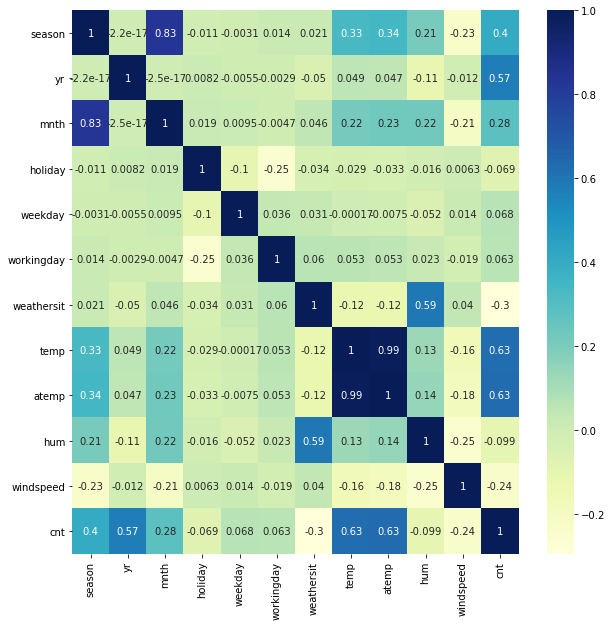

In [8]:
plt.figure(figsize=[10,10])
sb.heatmap(bikes.corr(), annot = True, cmap='YlGnBu')

- As the correlation between temp and atemp is too high, we can drop one of the column.

In [9]:
bikes = bikes.drop(columns = ['atemp'])

In [10]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Converting numeric variables to categorical variables

In [11]:
bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

- season contains four columns coded as the following:
     - 1:spring 
     - 2:summer
     - 3:fall
     - 4:winter
- So replacing the values with season name for better understanding of the season and converting the column to <b>category</b> type.

In [12]:
bikes.season = bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes.season = bikes.season.astype('category')
bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- weathersit contains four columns coded as the following:
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [14]:
bikes.weathersit = bikes.weathersit.map({1:'clear', 2:'mist', 3:'light snow', 4:'heavy snow'})
bikes.weathersit = bikes.weathersit.astype('category')
bikes.weathersit.value_counts()

clear         463
mist          246
light snow     21
Name: weathersit, dtype: int64

In [15]:
bikes.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

- months contains four columns coded as the following:
     - 1:jan 
     - 2:feb
     - 3:mar
     - 4:apr
     - 5:may
     - 6:jun
     - 7:jul
     - 8:aug
     - 9:sep
     - 10:oct
     - 11:nov
     - 12:dec

In [16]:
bikes.mnth = bikes.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'arp', 5:'may', 6:'jun',
                             7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bikes.mnth = bikes.mnth.astype('category')
bikes.mnth.value_counts()

oct    62
may    62
mar    62
jul    62
jan    62
dec    62
aug    62
sep    60
nov    60
jun    60
arp    60
feb    56
Name: mnth, dtype: int64

In [17]:
bikes.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

- weekday contains four columns coded as the following:
     - 1:mon 
     - 2:tues
     - 3:wed
     - 4:thurs
     - 5:fri
     - 6:sat
     - 0:sun

In [18]:
bikes.weekday = bikes.weekday.map({1:'mon', 2:'tues', 3:'wed', 4:'thurs', 5:'fri', 6:'sat', 0:'sun'})
bikes.weekday = bikes.weekday.astype('category')
bikes.weekday.value_counts()

sun      105
sat      105
mon      105
tues     104
thurs    104
fri      104
wed      103
Name: weekday, dtype: int64

In [19]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


In [20]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


## Visualising the data

- Target Variabel = <b>cnt</b>

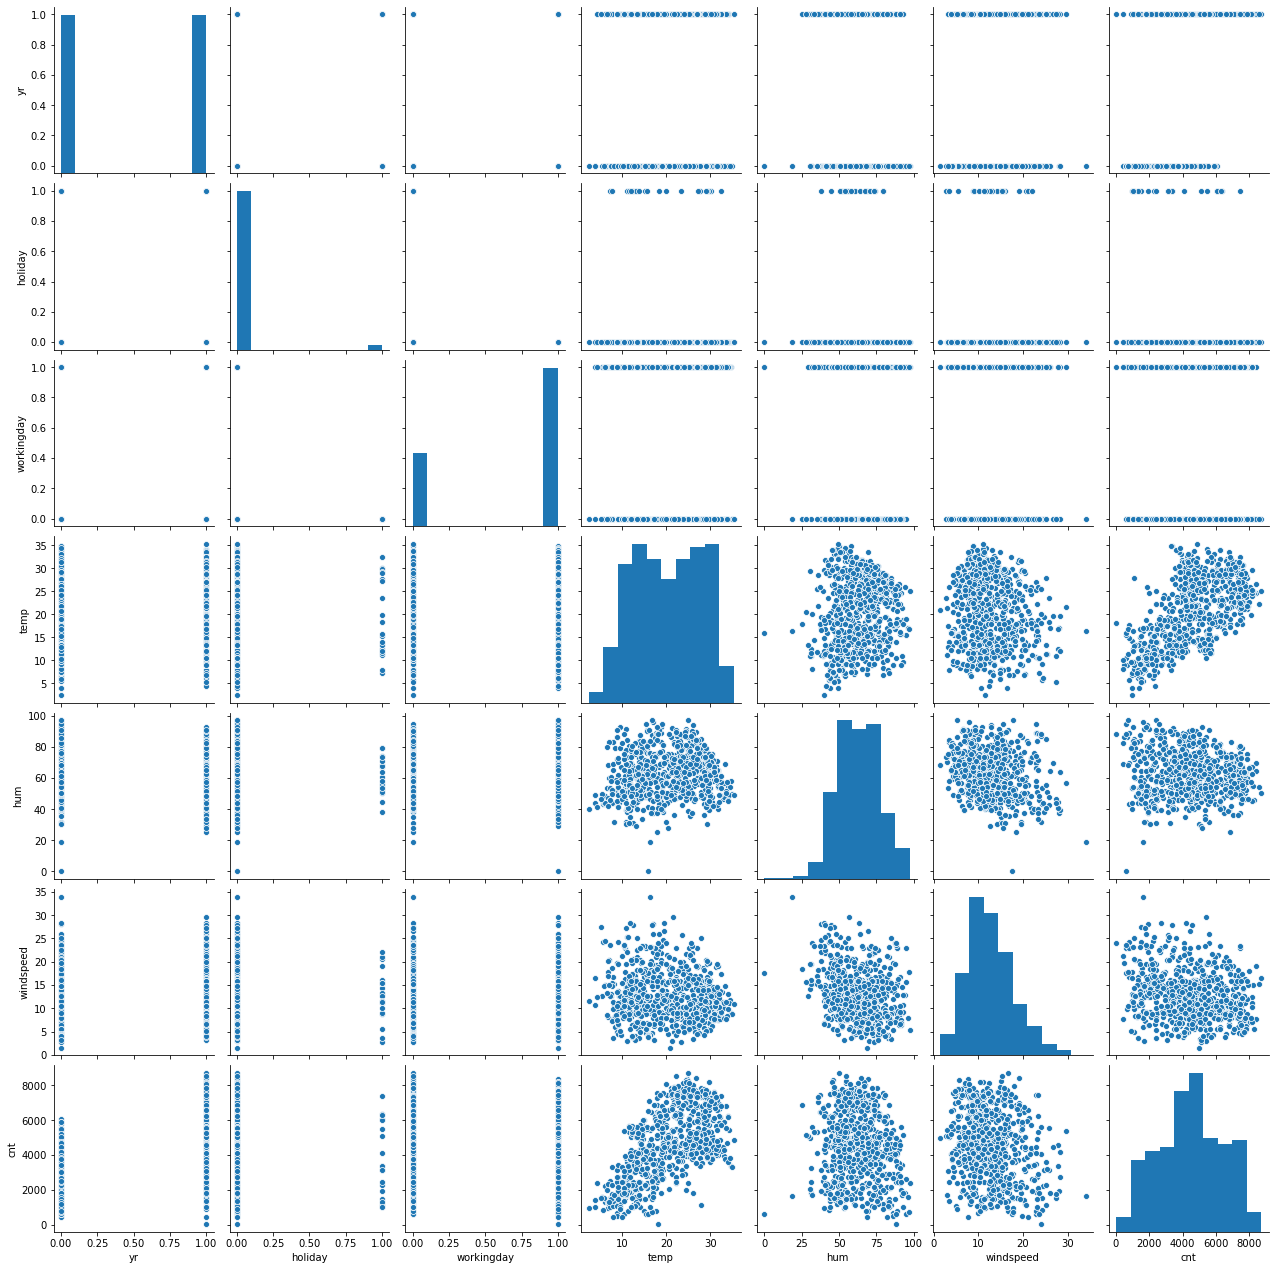

In [21]:
sb.pairplot(bikes)
plt.show()

### With categorical variables - univariate/bivariate analysis

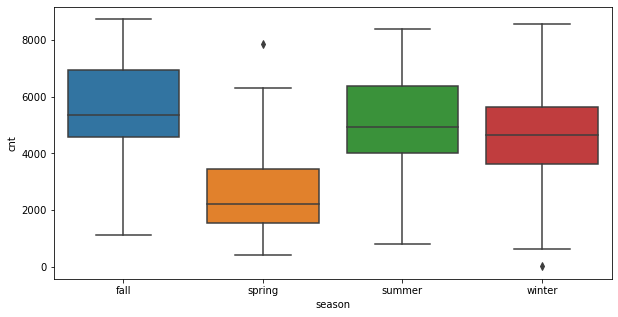

In [22]:
plt.figure(figsize= [10,5])
sb.boxplot(bikes.season, bikes.cnt)
plt.show()

<b>Inference :</b>
- In fall, most of the bikes were rented.

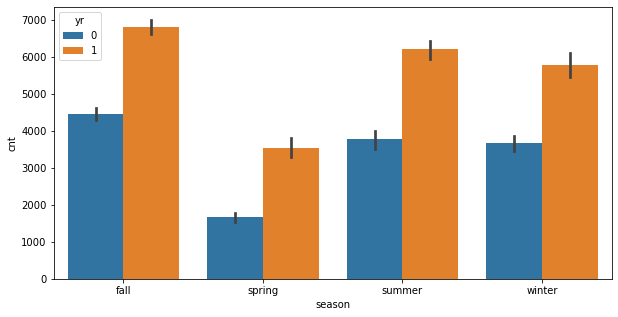

In [23]:
plt.figure(figsize= [10,5])
sb.barplot(bikes.season, bikes.cnt, data = bikes, hue='yr')
plt.show()

<b>Inference :</b>
- In the fall season, most of the bike were rented in both the years
- Bikes rented in 2019 were more than 2018 irrespective of the seasons.

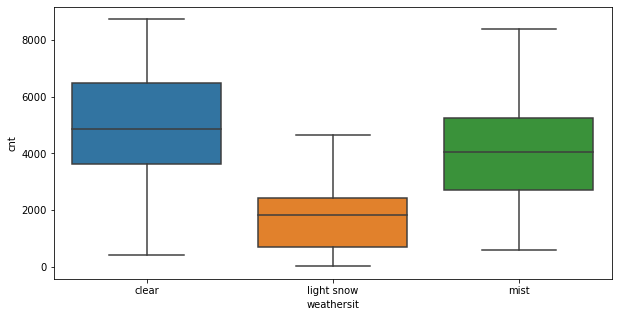

In [24]:
plt.figure(figsize= [10,5])
sb.boxplot(bikes.weathersit, bikes.cnt)
plt.show()

<b>Inference :</b>
- No bikes were rented in heavy snow weather.
- The maximum bikes were rented in clear weather.

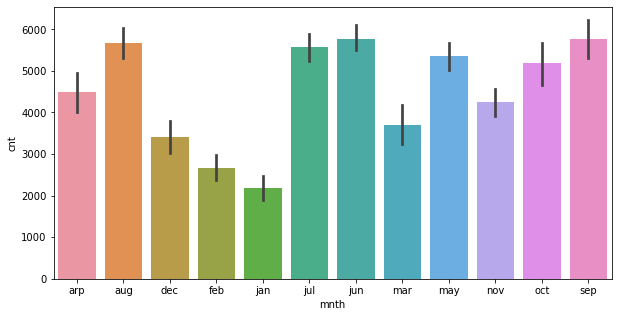

In [25]:
plt.figure(figsize= [10,5])
sb.barplot(bikes.mnth, bikes.cnt)
plt.show()

<b>Inference :</b>
- From june to october there was spike in rents.

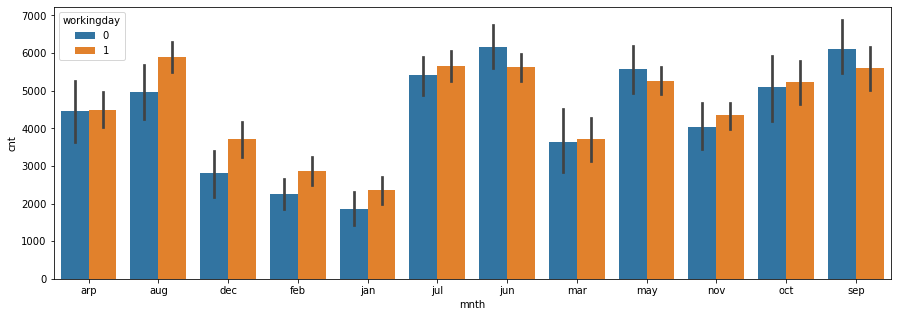

In [26]:
plt.figure(figsize= [15,5])
sb.barplot(bikes.mnth, bikes.cnt, data=bikes, hue='workingday')
plt.show()

<b>Inference :</b>
- From june to october there were more bikes rented than the other months for both working and non-working days.
- For working days there were more rents than the non-working days throughout the year.

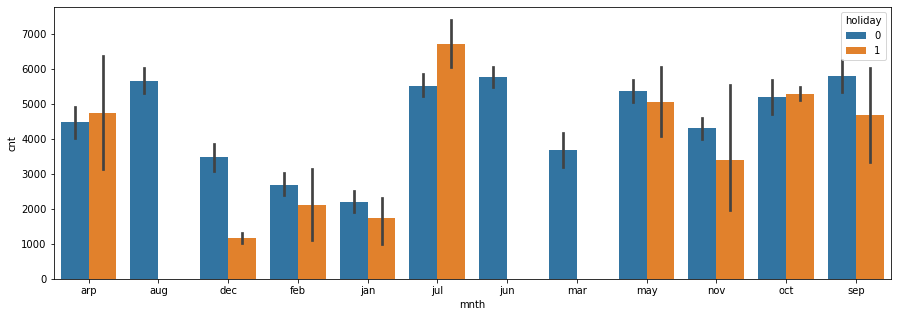

In [27]:
plt.figure(figsize= [15,5])
sb.barplot(bikes.mnth, bikes.cnt, data=bikes, hue='holiday')
plt.show()

<b>Inference :</b>
- There were no rents in month of march, june and august during holidays.
- During holidays, the rents were more in july.
- During non-holidays, the most number of rents were made in september, october.

### With numerical variables

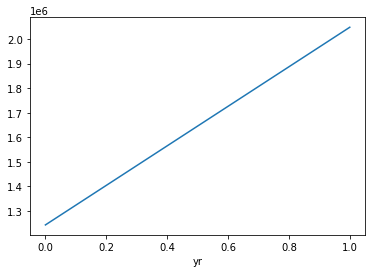

In [28]:
bikes.groupby(['yr'])['cnt'].sum().plot()

<b>Inference :</b>
- More rents were made in 2019

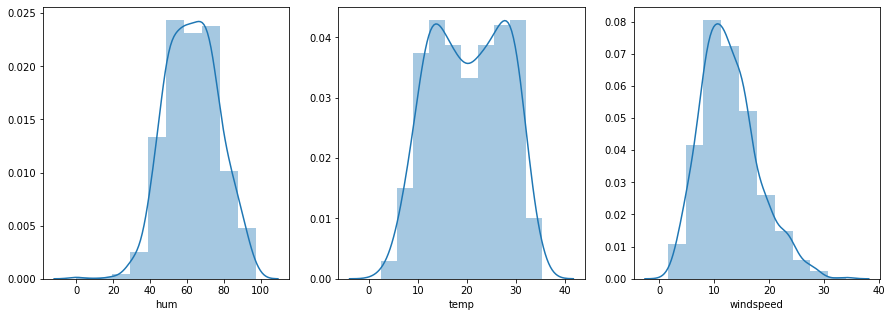

In [29]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
sb.distplot(bikes['hum'], bins = 10)

plt.subplot(1,3,2)
sb.distplot(bikes['temp'], bins= 10)

plt.subplot(1,3,3)
sb.distplot(bikes['windspeed'], bins =10)
plt.show()

<b>Inference :</b>
- The data is normally distibuted.

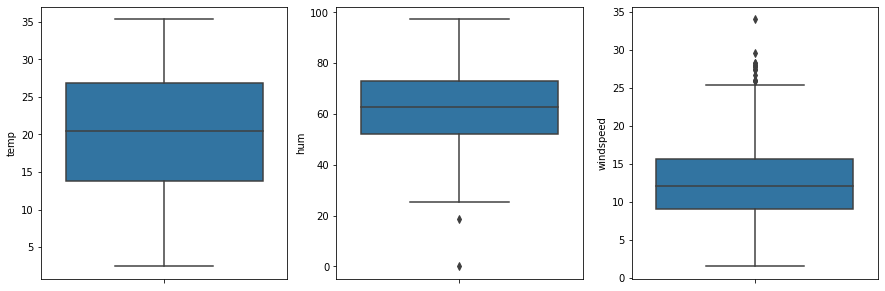

In [30]:
plt.figure(figsize = [15,5])
plt.subplot(1,3,1)
sb.boxplot(y=bikes.temp)

plt.subplot(1,3,2)
sb.boxplot(y=bikes.hum)

plt.subplot(1,3,3)
sb.boxplot(y=bikes.windspeed)
plt.show()

<b>Inference :</b>
- There are no such variable in the outliers.

## Data Preparation

### Dummy Variables

In [31]:
status = pd.get_dummies(bikes['season'], drop_first=True)
status.sample(n=10)

,spring,summer,winter
176,0,0,0
582,0,0,0
267,0,0,1
349,0,0,1
73,1,0,0
322,0,0,1
420,1,0,0
648,0,0,1
560,0,0,0
260,0,0,0


The season can be identified using the 3 columns:
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [32]:
bikes = pd.concat([bikes, status], axis = 1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,sat,0,mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sun,0,mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [33]:
bikes = bikes.drop(columns = ['season'])

In [34]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   yr          730 non-null    int64   
 1   mnth        730 non-null    category
 2   holiday     730 non-null    int64   
 3   weekday     730 non-null    category
 4   workingday  730 non-null    int64   
 5   weathersit  730 non-null    category
 6   temp        730 non-null    float64 
 7   hum         730 non-null    float64 
 8   windspeed   730 non-null    float64 
 9   cnt         730 non-null    int64   
 10  spring      730 non-null    uint8   
 11  summer      730 non-null    uint8   
 12  winter      730 non-null    uint8   
dtypes: category(3), float64(3), int64(4), uint8(3)
memory usage: 45.2 KB


In [35]:
status = pd.get_dummies(bikes['mnth'], drop_first=True)
status.sample(n=10)

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
416,0,0,1,0,0,0,0,0,0,0,0
49,0,0,1,0,0,0,0,0,0,0,0
257,0,0,0,0,0,0,0,0,0,0,1
248,0,0,0,0,0,0,0,0,0,0,1
409,0,0,1,0,0,0,0,0,0,0,0
620,0,0,0,0,0,0,0,0,0,0,1
556,0,0,0,0,1,0,0,0,0,0,0
363,0,1,0,0,0,0,0,0,0,0,0
192,0,0,0,0,1,0,0,0,0,0,0
330,0,0,0,0,0,0,0,0,1,0,0


In [36]:
bikes = pd.concat([bikes, status], axis = 1)
bikes = bikes.drop(columns = ['mnth'])
bikes.head() 

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,sat,0,mist,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,mist,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tues,1,clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [37]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   yr          730 non-null    int64   
 1   holiday     730 non-null    int64   
 2   weekday     730 non-null    category
 3   workingday  730 non-null    int64   
 4   weathersit  730 non-null    category
 5   temp        730 non-null    float64 
 6   hum         730 non-null    float64 
 7   windspeed   730 non-null    float64 
 8   cnt         730 non-null    int64   
 9   spring      730 non-null    uint8   
 10  summer      730 non-null    uint8   
 11  winter      730 non-null    uint8   
 12  aug         730 non-null    uint8   
 13  dec         730 non-null    uint8   
 14  feb         730 non-null    uint8   
 15  jan         730 non-null    uint8   
 16  jul         730 non-null    uint8   
 17  jun         730 non-null    uint8   
 18  mar         730 non-null    uint8   
 19  may     

In [38]:
status = pd.get_dummies(bikes['weekday'], drop_first=True)
status.sample(n=10)

,mon,sat,sun,thurs,tues,wed
252,0,1,0,0,0,0
238,0,1,0,0,0,0
441,0,0,1,0,0,0
162,0,0,1,0,0,0
231,0,1,0,0,0,0
297,0,0,0,0,1,0
142,1,0,0,0,0,0
90,0,0,0,0,0,0
669,0,0,0,1,0,0
304,0,0,0,0,1,0


In [39]:
bikes = pd.concat([bikes, status], axis = 1)
bikes = bikes.drop(columns = ['weekday'])
bikes.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,0,0,0,mist,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
status = pd.get_dummies(bikes['weathersit'], drop_first=True)
status.sample(n=10)

,light snow,mist
459,0,0
150,0,0
235,0,0
474,0,0
328,0,0
15,0,0
112,0,1
76,0,0
616,0,0
647,0,0


The weather situation can be identified using the 2 columns:
- `00` will correspond to `clear`
- `01` will correspond to `mist`
- `01` will correspond to `light snow`

In [41]:
bikes = pd.concat([bikes, status], axis = 1)
bikes = bikes.drop(columns = ['weathersit'])
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thurs,tues,wed,light snow,mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  aug         730 non-null    uint8  
 11  dec         730 non-null    uint8  
 12  feb         730 non-null    uint8  
 13  jan         730 non-null    uint8  
 14  jul         730 non-null    uint8  
 15  jun         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  may         730 non-null    uint8  
 18  nov         730 non-null    uint8  
 19  oct         730 non-null    u

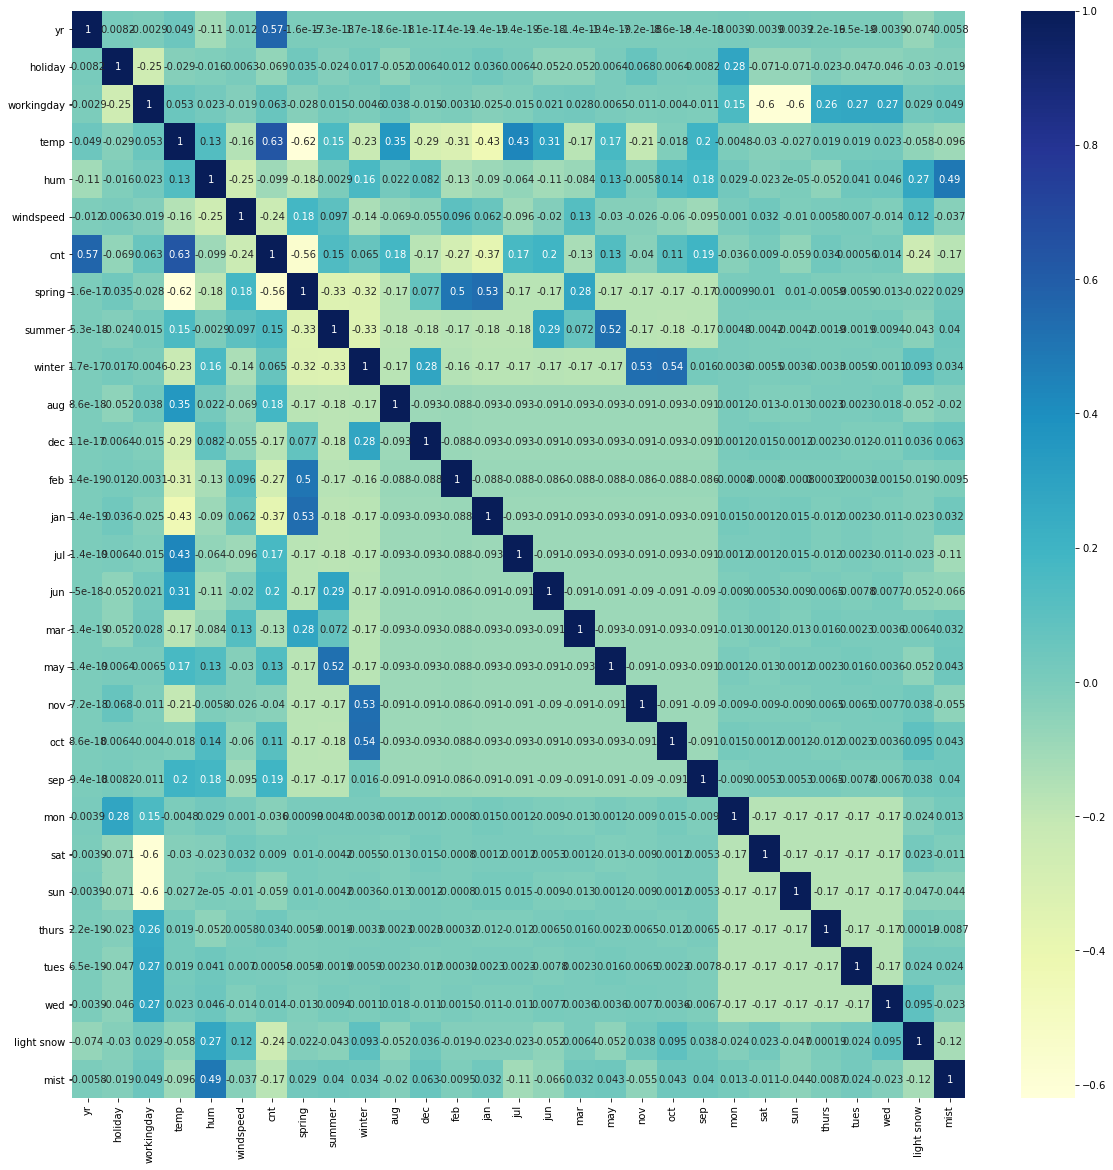

In [43]:
plt.figure(figsize =[20,20])
sb.heatmap(bikes.corr(), annot = True, cmap= 'YlGnBu')

### Splitting the data into train and test

In [44]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
bikes_train.shape

(510, 29)

In [46]:
bikes_test.shape

(219, 29)

### Rescaling the train data

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
var = ['temp','hum','windspeed', 'cnt']

bikes_train[var] = scaler.fit_transform(bikes_train[var])

In [50]:
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thurs,tues,wed,light snow,mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### Splitting train data into X and y

In [51]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [52]:
X_train.shape

(510, 28)

In [53]:
y_train.shape

(510,)

## Data Modelling

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 6),
 ('thurs', False, 11),
 ('tues', False, 9),
 ('wed', False, 12),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [59]:
col  = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'sat', 'light snow', 'mist'],
      dtype='object')

### Building model using statsmodel for detailed analysis

In [60]:
import statsmodels.api as sm

In [61]:
X_train = X_train[col]

In [62]:
X_train_1 = sm.add_constant(X_train)

In [63]:
X_train_1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,jan,jul,sep,sat,light snow,mist
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


In [64]:
lm_1 = sm.OLS(y_train, X_train_1).fit()

In [65]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 15 May 2021   Prob (F-statistic):          2.31e-191
Time:                        14:41:17   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

In [66]:
#Calculate the VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_train_1.pop('const')
x = X_train_1
vif['Featues'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',  ascending = False)
vif

,Featues,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,mist,2.29
0,yr,2.09
12,sat,1.98


For model-1:
- R-squared is 84.9% and adjusted R-squared is 84%. This states the overall variance of the model is good.
- prob(F-stats) is closer to 0. This implies the overall model fit is significant.
- p-value for each constant is less than 0.05. This implies that the coffiecient for each variable is significant.
- VIF for humidity, temperature and workingday is very high. This shows multicollinearity in humidity.
- So, dropping the column <b>humidity</b> can creating the linear model 2.

In [67]:
col = list(X_train.columns)
col.remove('hum')
col

['yr',
 'holiday',
 'workingday',
 'temp',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'jan',
 'jul',
 'sep',
 'sat',
 'light snow',
 'mist']

In [68]:
X_train_2 = X_train[col]
X_train_2 = sm.add_constant(X_train_2)
X_train_2.head()

,const,yr,holiday,workingday,temp,windspeed,spring,summer,winter,jan,jul,sep,sat,light snow,mist
653,1.0,1,0,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,0,1


In [69]:
lm_2 = sm.OLS(y_train, X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 15 May 2021   Prob (F-statistic):          7.33e-189
Time:                        14:41:17   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

In [70]:
#Calculate the VIF of the model

vif = pd.DataFrame()
X_train_2.pop('const')
x = X_train_2
vif['Featues'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',  ascending = False)
vif

,Featues,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,sat,1.97
8,jan,1.62
9,jul,1.59


For model-2:
- R-squared is 84.3% and adjusted R-squared is 83.9%. This states the overall variance of the model is good.
- prob(F-stats) is closer to 0. This implies the overall model fit is significant.
- p-value for each constant is less than 0.05. This implies that the coffiecient for each variable is significant.
- VIF for temperature and workingday is very high. This shows multicollinearity in temperature.
- So, dropping the column <b>temperature</b> can creating the linear model 3.

In [71]:
col = list(X_train_2.columns)
col.remove('temp')
col

['yr',
 'holiday',
 'workingday',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'jan',
 'jul',
 'sep',
 'sat',
 'light snow',
 'mist']

In [72]:
X_train_3 = X_train[col]
X_train_3 = sm.add_constant(X_train_3)
X_train_3.head()

,const,yr,holiday,workingday,windspeed,spring,summer,winter,jan,jul,sep,sat,light snow,mist
653,1.0,1,0,1,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.188475,0,1,0,0,0,0,1,0,1


In [73]:
lm_3 = sm.OLS(y_train, X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sat, 15 May 2021   Prob (F-statistic):          4.04e-154
Time:                        14:41:18   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5448      0.020     27.136      0.0

In [74]:
#Calculate the VIF of the model

vif = pd.DataFrame()
X_train_3.pop('const')
x = X_train_3
vif['Featues'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',  ascending = False)
vif

,Featues,VIF
3,windspeed,4.27
2,workingday,3.83
4,spring,2.97
5,summer,2.27
6,winter,1.99
0,yr,1.91
10,sat,1.69
7,jan,1.60
12,mist,1.56
8,jul,1.30


For model-3:
- R-squared is 78.1% and adjusted R-squared is 77.5%. This states the overall variance of the model is good.
- prob(F-stats) is closer to 0. This implies the overall model fit is significant.
- p-value for each constant is less than 0.05 except july which is 0.645 which is very high. This implies that the coffiecient is not significant for july.
- VIF for every feature is less than 5. This shows no multicollinearity.
- So, dropping the column <b>jul</b> can creating the linear model 4.

In [75]:
col = list(X_train_3.columns)
col.remove('jul')
col

['yr',
 'holiday',
 'workingday',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'jan',
 'sep',
 'sat',
 'light snow',
 'mist']

In [76]:
X_train_4 = X_train[col]
X_train_4 = sm.add_constant(X_train_4)
X_train_4.head()

,const,yr,holiday,workingday,windspeed,spring,summer,winter,jan,sep,sat,light snow,mist
653,1.0,1,0,1,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,0,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.255342,1,0,0,0,0,1,0,1
728,1.0,1,0,0,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0,0.188475,0,1,0,0,0,1,0,1


In [77]:
lm_4 = sm.OLS(y_train, X_train_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 15 May 2021   Prob (F-statistic):          3.62e-155
Time:                        14:41:18   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5409      0.018     29.669      0.0

In [78]:
#Calculate the VIF of the model

vif = pd.DataFrame()
X_train_4.pop('const')
x = X_train_4
vif['Featues'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',  ascending = False)
vif

,Featues,VIF
3,windspeed,4.12
2,workingday,3.54
4,spring,2.68
5,summer,2.00
0,yr,1.89
6,winter,1.78
9,sat,1.62
7,jan,1.60
11,mist,1.56
8,sep,1.20


For model-4:
- R-squared is 78.1% and adjusted R-squared is 77.6%. This states the overall variance of the model is good.
- prob(F-stats) is closer to 0. This implies the overall model fit is significant.
- p-value for each constant is less than 0.05 except holiday which is 0.079 which is very higher than 0.05. This implies that the coffiecient is not significant for holiday.
- VIF for every feature is less than 5. This shows no multicollinearity.
- So, dropping the column <b>holiday</b> can creating the linear model 5.

In [79]:
col = list(X_train_4.columns)
col.remove('holiday')
col

['yr',
 'workingday',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'jan',
 'sep',
 'sat',
 'light snow',
 'mist']

In [80]:
X_train_5 = X_train[col]
X_train_5 = sm.add_constant(X_train_5)
X_train_5.head()

,const,yr,workingday,windspeed,spring,summer,winter,jan,sep,sat,light snow,mist
653,1.0,1,1,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,1,0,0,0,0,1,0,1
728,1.0,1,0,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.188475,0,1,0,0,0,1,0,1


In [81]:
lm_5 = sm.OLS(y_train, X_train_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sat, 15 May 2021   Prob (F-statistic):          1.30e-155
Time:                        14:41:19   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5334      0.018     30.033      0.0

In [82]:
#Calculate the VIF of the model

vif = pd.DataFrame()
X_train_5.pop('const')
x = X_train_5
vif['Featues'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',  ascending = False)
vif

,Featues,VIF
2,windspeed,4.04
1,workingday,3.29
3,spring,2.65
4,summer,1.99
0,yr,1.88
5,winter,1.73
6,jan,1.60
8,sat,1.56
10,mist,1.56
7,sep,1.18


For model-5:
- R-squared is 77.9% and adjusted R-squared is 77.5%. This states the overall variance of the model is good.
- prob(F-stats) is closer to 0. This implies the overall model fit is significant.
- p-value for each constant is less than 0.05. This implies that the coffiecient for every feature is significant.
- VIF for every feature is less than 5. This shows no multicollinearity.
- Therefore, we would take model 5 as our final model.

## Residual analysis of the train data

In [83]:
X_train = sm.add_constant(X_train_5)
X_train.head()

,const,yr,workingday,windspeed,spring,summer,winter,jan,sep,sat,light snow,mist
653,1.0,1,1,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,1,0,0,0,0,1,0,1
728,1.0,1,0,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.188475,0,1,0,0,0,1,0,1


In [84]:
y_train_pred = lm_5.predict(X_train)

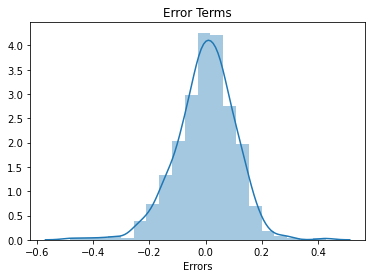

In [85]:
sb.distplot((y_train - y_train_pred), bins =20)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

- Error terms are normally distributed.

Text(0.5, 0, 'Predicted value')

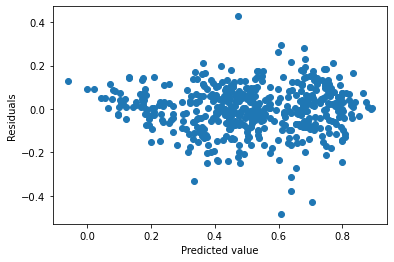

In [86]:
plt.scatter(x = y_train_pred, y =(y_train - y_train_pred))
plt.ylabel('Residuals')
plt.xlabel('Predicted value')

- Error terms are independent of each other.

## Making Predictions

### Rescaling the test data

In [87]:
bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thurs,tues,wed,light snow,mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [88]:
col = ['hum', 'temp', 'windspeed', 'cnt']
bikes_test[col] = scaler.transform(bikes_test[col])

In [89]:
bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thurs,tues,wed,light snow,mist
184,0,1,0,0.307016,1.865042,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.330605,1.725746,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.198574,2.396893,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.323916,1.215425,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.302087,0.853260,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Splitting train data into X and y

In [90]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [91]:
X_test = X_test[list(X_train_5.columns)]
X_test = sm.add_constant(X_test)
X_test.head()

,const,yr,workingday,windspeed,spring,summer,winter,jan,sep,sat,light snow,mist
184,1.0,0,0,0.084219,0,0,0,0,0,0,0,1
535,1.0,1,1,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,1,0,0,0,0,1
221,1.0,0,1,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,1,0,0,0,0,0,0


In [92]:
y_test_pred = lm_5.predict(X_test)

### Computig R2 and mean squared error 

In [93]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [94]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.11092738376406346

In [95]:
r2 = r2_score(y_test, y_test_pred)
r2

0.7409269375982521

In [96]:
adj_r2score = 1-(1-r2)*(bikes_test.shape[0]-1)/(bikes_test.shape[0]-11-1)
adj_r2score

0.7271597700310095

- R-squared of test data is 74% which is closer to R-squared of the train data(77.9%)
- Adjusted R-squared of test data is 72.7% which is close to train data adjusted R-squared(77.5%)

## Model Evaluation

Text(0, 0.5, 'y_pred')

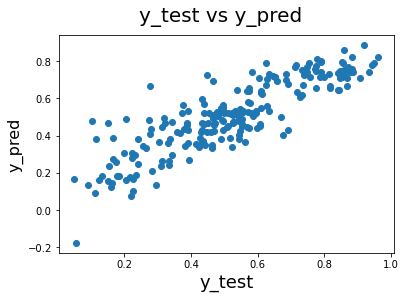

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

- The equation for the our best fitted model is - <br>
`cnt = 0.248*yr + 0.056*workingday - 0.188*windspeed - 0.258*spring - 0.04*summer - 0.072*winter - 0.103*jan + 0.071*sep + 0.065*sat - 0.303*lightSnow - 0.088*mist + 0.533` 